In [2]:
import pycountry
import pandas as pd
import numpy as np
import covid
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 10.0 MB 3.2 MB/s eta 0:00:01
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=6a54b5eeb5b1993eaf86edb315867f4dbe505401a702d8629169918458e5b91b
  Stored in directory: /home/jovyan/.cache/pip/wheels/5e/d3/aa/d4d009d8d8489715d33932f44fc2582dfc216e0fde3a5016ee
Successfully built pycountry
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 109 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 7.4 MB 6.7 MB/s eta 0:00:01
  Created wheel for covid: filename=covid-2.2.10-py3-none-any.whl size=8447 sha256=4f6755d4b0f97177f74fbdb483bfa6b599789422b142232093a671d82c1a1d07
  Stored in dir

In [3]:
# ----------- Step 1 ------------
URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df1 = pd.read_csv(URL_DATASET)


In [4]:
## Filter
df1 = df1.filter(["Country", "Date", "Confirmed"]) 
bra_nz = df1.loc[df1["Country"].isin(['Brazil','New Zealand'])]
bra_nz["Date"] = pd.to_datetime(bra_nz["Date"])
bra_nz=bra_nz.pivot(index='Date', columns='Country', values='Confirmed')

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
## Define columns
data_columns = ['Brazil', 'New Zealand']
## And index retrieveing month
## and rolling
bra_nz_7d = np.log(bra_nz[data_columns]).rolling(7, center=True).mean()
bra_nz_7d["Month"] = bra_nz_7d.index.month

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


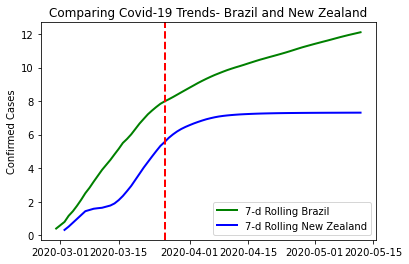

In [7]:
# Use seaborn style defaults and set the default figure size
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(bra_nz_7d['Brazil'], linewidth=2, label='7-d Rolling Brazil', color='green')
ax.plot(bra_nz_7d['New Zealand'], linewidth=2, label='7-d Rolling New Zealand', color='blue')
ax.axvline(pd.to_datetime('2020-03-26'), color='r', linestyle='--', lw=2)

# Set x-ticks to yearly interval and add legend and labels
ax.legend()
ax.set_ylabel('Confirmed Cases')
ax.set_title('Comparing Covid-19 Trends- Brazil and New Zealand');